In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
def init_state(rows=6, columns=7):
    return np.zeros((rows, columns), dtype=np.int8)
def calc_legal_actions(state):
    return np.where((state==0).any(axis=0))[0]

def render(state):
    plt.imshow(state*2./3., vmin=-1, vmax=1, cmap='seismic')
    plt.colorbar()
    plt.ylim(-0.5, 5.5)
    plt.xticks(np.arange(7)+.5)
    plt.yticks(np.arange(6)+.5)
    plt.grid()
    
def take_action(state, action, player):
    row = np.where(state[:, action]==0)[0].min()
    ns = state.copy()
    ns[row, action] = player
    return ns

def calc_winner(state):
    win = state[:, :-3]+state[:, 1:-2]+state[:, 2:-1]+state[:, 3:]
    if (np.abs(win)==4).any():
        return np.sign(win[np.where(np.abs(win)==4)])[0]
        
    win = state[:-3, :]+state[1:-2, :]+state[2:-1, :]+state[3:, :]
    if (np.abs(win)==4).any():
        return np.sign(win[np.where(np.abs(win)==4)])[0]
        
    win = state[:-3, :-3]+state[1:-2, 1:-2]+state[2:-1, 2:-1]+state[3:, 3:]
    if (np.abs(win)==4).any():
        return np.sign(win[np.where(np.abs(win)==4)])[0]
        
    win = state[3:, :-3]+state[2:-1, 1:-2]+state[1:-2, 2:-1]+state[:-3, 3:]
    if (np.abs(win)==4).any():
        return np.sign(win[np.where(np.abs(win)==4)])[0]
    return 0
    
def is_draw(state):
    return (state!=0).all()

def is_done(state):
    winner = calc_winner(state)
    return is_draw(state) or winner != 0, winner

In [147]:
def state_to_input_representation(state, player):
    return np.stack((state==1, state==-1, state!=0, np.full_like(state, player)))



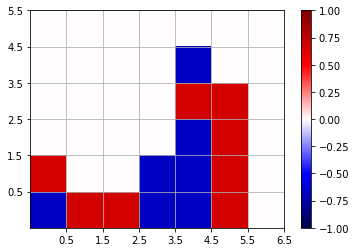

1
(True, 1)


In [146]:
state = init_state()

player = 1
for i in range(15):
    state = put(state, np.random.choice(calc_legal_actions(state)), player)
    player = -player

render(state)


plt.show()

print(is_done(state))



In [129]:
calc_legal_actions(state)

array([0, 3, 6])